In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
d = pd.read_csv('C:\\Users\\shiva\\Documents\\Bengaluru_House_Data.csv')
d.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
d.shape

(13320, 9)

In [6]:
d.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [7]:
d.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [8]:
d2 = d.drop(['area_type', 'availability','society','balcony'], axis=1)
d2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
d2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
d2 = d2.dropna()
d2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
d2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
d2['bhk'] = d2['size'].apply(lambda x : int(x[0]))
d2['bhk'].head(15)

0     2
1     4
2     3
3     3
4     2
5     2
6     4
7     4
8     3
9     6
10    3
11    4
12    2
13    2
14    3
Name: bhk, dtype: int64

In [13]:
d2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
# converting sqft values to float
def float_con(x):
  try:
    float(x)
  except:
    return False
  return True

In [15]:
d2[~d2['total_sqft'].apply(float_con)].head(15)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [16]:
def con_to_num(x):
  t = x.split('-')
  if len(t) == 2:
    return (float(t[0]) + float(t[1]))/2
  try:
    return float(x)
  except:
    return None

In [17]:
d3 = d2.copy()
d3['total_sqft'] = d3['total_sqft'].apply(con_to_num)
d3.head(15)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [18]:
# creating a new col 'price_per_sqft' and assigning the price value per sqft
d4 = d3.copy()
d4['price_per_sqft'] = (d4['price']*100000) / d4['total_sqft']
d4.head(15)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [19]:
loc_stat = d4.groupby("location")['location'].agg('count').sort_values(ascending=False)
len(loc_stat[loc_stat<=10])

1063

In [20]:
loc_less_ten = loc_stat[loc_stat<=10]
len(d4.location.unique())

1304

In [21]:
d4.location = d4.location.apply(lambda x : 'other' if x in loc_less_ten else x)
len(d4.location.unique())

242

In [22]:
d4.head(15)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [23]:
#removing outliers

In [24]:
d4[d4['total_sqft']/d4['bhk']<300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [25]:
d5 = d4[~(d4['total_sqft']/d4['bhk']<300)]
d5.shape

(12518, 7)

In [26]:
d5.price_per_sqft.describe()

count     12472.000000
mean       6321.224286
std        4188.395933
min         267.829813
25%        4210.526316
50%        5295.544522
75%        6929.522602
max      176470.588235
Name: price_per_sqft, dtype: float64

In [27]:
def rem_pps_ol(df):
  df_res = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sqft)
    sd = np.std(subdf.price_per_sqft)
    red_df = subdf[(subdf.price_per_sqft>(m-sd)) & (subdf.price_per_sqft<(m+sd))]
    df_res = pd.concat([df_res, red_df], ignore_index=True)
  return df_res

In [28]:
d6 = rem_pps_ol(d5)
d6.shape

(10258, 7)

In [29]:
def scatter_plot(df, loc):
  bhk2 = df[(df.location == loc) & (df.bhk == 2)]
  bhk3 = df[(df.location == loc) & (df.bhk == 3)]

  sns.scatterplot(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK')
  sns.scatterplot(bhk3.total_sqft, bhk3.price, color='orange', label='3 BHK')

  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price (Lakh Indian Rupees)")
  plt.title(loc)
  plt.legend()

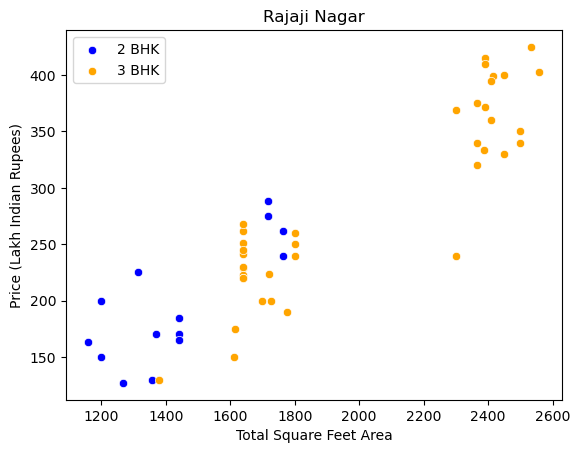

In [30]:
scatter_plot(d6,"Rajaji Nagar")

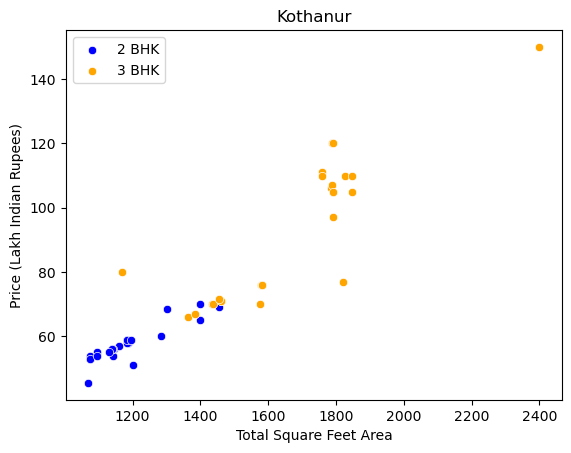

In [31]:
scatter_plot(d6,"Kothanur")

In [32]:
def rem_bhk_ol(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [33]:
d7 = rem_bhk_ol(d6)
d7.shape

(7320, 7)

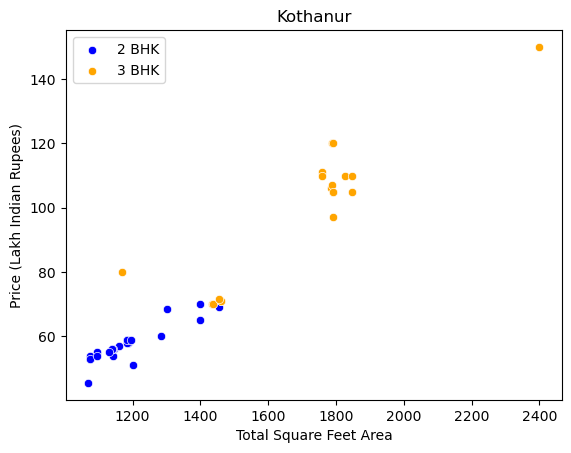

In [34]:
scatter_plot(d7,"Kothanur")

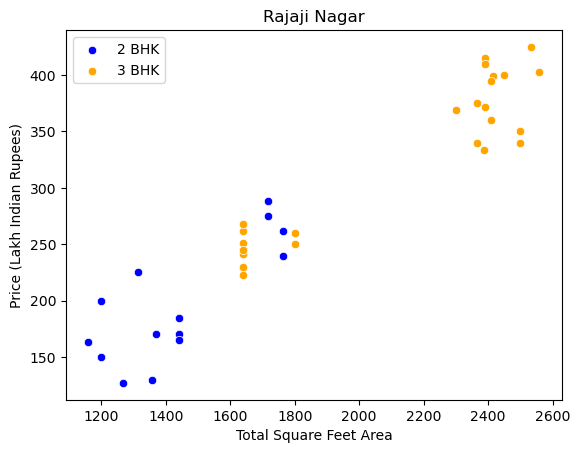

In [35]:
scatter_plot(d7,"Rajaji Nagar")

Text(0, 0.5, 'Count')

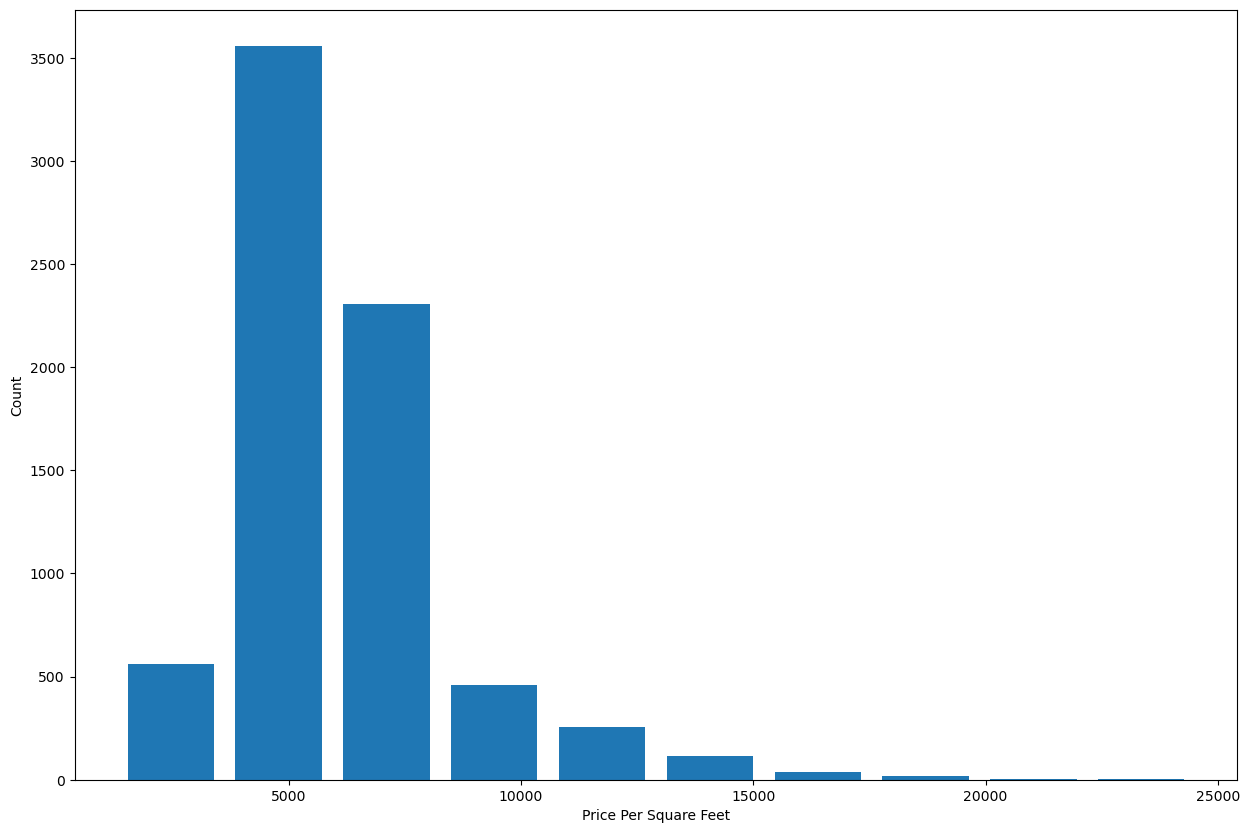

In [36]:
plt.rcParams["figure.figsize"] = (15,10)
plt.hist(d7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [37]:
d7.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 10., 12., 16., 15.,
       13.])

Text(0, 0.5, 'Count')

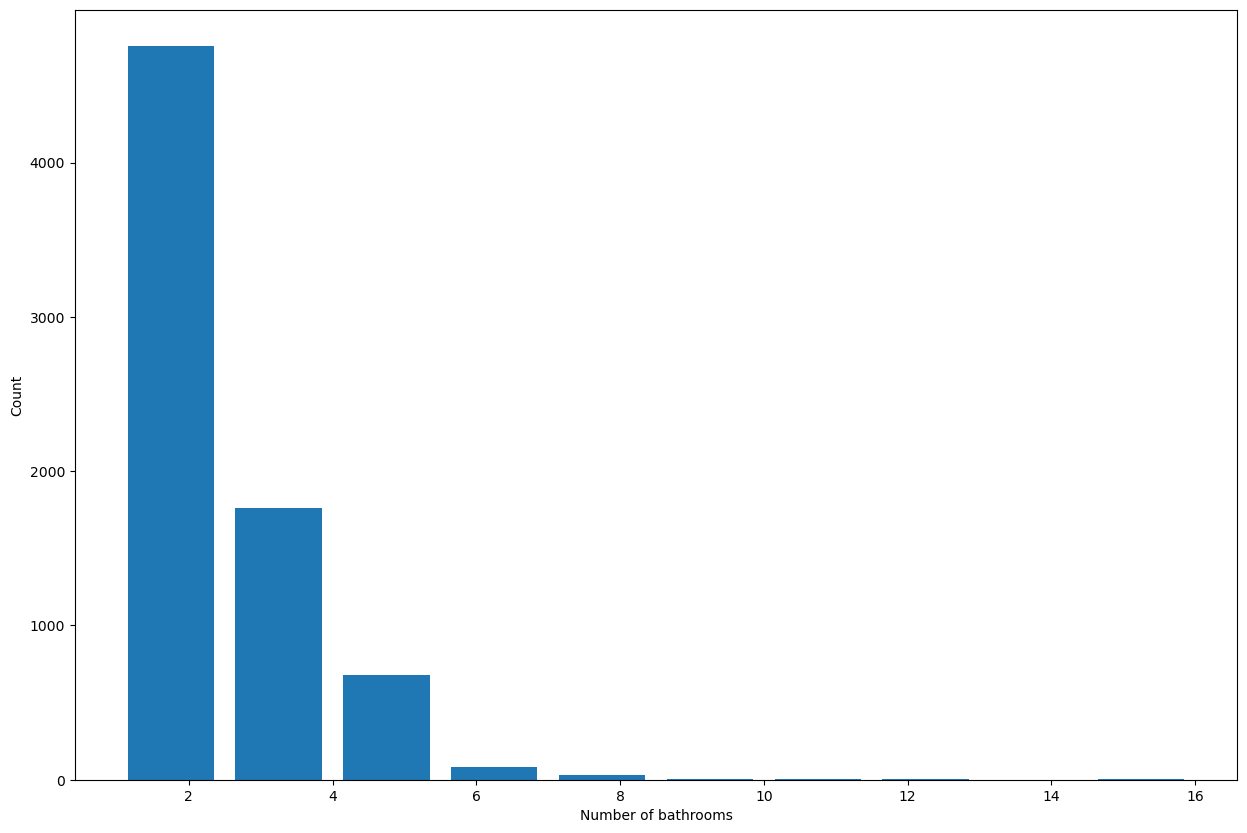

In [38]:
plt.hist(d7.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [39]:
d7[d7.bath > d7.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5132,Munnekollal,10 Bedroom,7200.0,10.0,200.0,1,2777.777778
5241,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
5280,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,1,4000.000000
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8026,other,11 BHK,5000.0,9.0,360.0,1,7200.000000
8258,other,10 Bedroom,750.0,10.0,90.0,1,12000.000000
8416,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
8492,other,10 BHK,12000.0,12.0,525.0,1,4375.000000
8581,other,16 BHK,10000.0,16.0,550.0,1,5500.000000


In [40]:
d8 = d7[d7.bath < d7.bhk+2]
d8.shape

(7233, 7)

In [41]:
d9 = d8.drop(['size','price_per_sqft'],axis='columns')
d9.head(15)

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2
6,Devarachikkanahalli,1130.0,2.0,36.0,2
7,Devarachikkanahalli,1417.0,2.0,76.0,3
8,Devarachikkanahalli,1230.0,2.0,58.0,2
9,Devarachikkanahalli,1705.0,3.0,75.0,3
10,Devarachikkanahalli,1116.0,2.0,47.0,2


In [42]:
# creating dummies for location
dum = pd.get_dummies(d9.location)
d10 = pd.concat([d9,dum.drop('other', axis=1)], axis=1)
d10.head()

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
d11 = d10.drop('location', axis=1)
d11.head()

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,43.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
#model

In [45]:
x = d11.drop('price', axis=1)
y = d11.price
# splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [46]:
# building linear regression model and fitting it with the training dataset
from sklearn.linear_model import LinearRegression
z = LinearRegression()
z.fit(x_train, y_train)

LinearRegression()

In [47]:
z.score(x_test, y_test)

0.8524078370963719

In [48]:
y_pred = z.predict(x_test)

In [49]:
# using cross_val_score to find different sets of score values (K-Fold method)
from sklearn.model_selection import ShuffleSplit, cross_val_score

ss = ShuffleSplit(n_splits=5, test_size=0.3, random_state=5)

cross_val_score(z, x, y, cv=ss)

array([0.82023705, 0.84842321, 0.88096795, 0.79276099, 0.82850368])

In [50]:
# Finding the best model using GridsearchCV

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


def bestmodel(x,y):

    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    for name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=ss, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [52]:
bestmodel(x,y)

,model,best_score,best_params
0,linear_regression,0.834179,{'normalize': False}
1,lasso,0.696373,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.724975,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [53]:
#making prediction

In [54]:
d11.columns

Index(['total_sqft', 'bath', 'price', 'bhk', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=245)

In [55]:
def price_pred(location,sqft,bath,bhk):
   l_ind = np.where(x.columns == location)[0][0]

   a = np.zeros(len(x.columns))
   a[0] = sqft
   a[1] = bath
   a[2] = bhk
   if l_ind >= 0:
     a[l_ind] = 1

   return z.predict([a])[0] 

In [56]:
from sklearn import metrics as m
print("R2-Score : ",m.r2_score(y_test, y_pred))
print("Mean Absolute Error : ", m.mean_absolute_error(y_test, y_pred))

R2-Score :  0.8524078370963719
Mean Absolute Error :  18.356855498624007


In [57]:
price_pred('1st Phase JP Nagar',1000, 2, 3)

82.50873620746978

In [58]:
#Conclusion:
#From the above made model, we can conclude that the Linear Regression algorithm performs better in performing prediction of the real-estate price than Lasso Regressor and Decision Tree Regressor with an accuracy of 82% and in some cases it increased upto 89%.